#### Problem 7: Numeric Differentiation and Integration

In [2]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import myint
import myder

1) Acceleration and Displacement

Homegrown integral (displacement) = 360.0
Built in integral (displacement) = 360.0


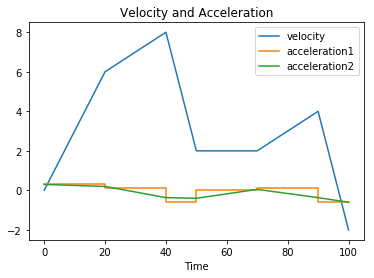

In [3]:
v = [0, 6, 8, 2, 2, 4, -2]
t = [0, 20, 40, 50, 70, 90, 100]
#acceleration
#homegrown function
dv = np.diff(v)
dt = np.diff(t)
a = dv/dt
a = np.append(a[0], a)

#built-in function
a1 = np.gradient(v, t)

#velocity and accelerations plot
plt.plot(t, v)
plt.step(t, a)
plt.plot(t, a1)
plt.legend(["velocity", "acceleration1", "acceleration2"])
plt.title("Velocity and Acceleration")
plt.xlabel("Time")

#displacement
#homegrown function
h = dt
trap = 0
for i in range(len(v)-1):
    trap = trap + 0.5*(v[i]+v[i+1])*h[i]
print("Homegrown integral (displacement) =", trap)

#built-in function
D = np.trapz(v, t)
print("Built in integral (displacement) =", D)

For this function it makes more sense to use the trapezoid method than Simpson's method to calculate the integral because the trapezoid method can exactly integrate a linear function like this one

2) $$f(x) = sin^2\left( {\frac{1}{x(2-x)}}\right )$$
a) Derivative

[0, 3, -1000, 1000]

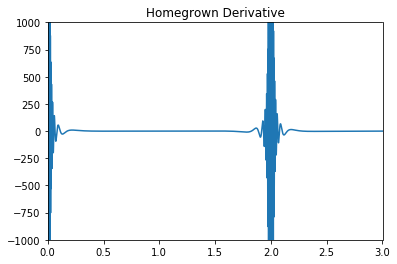

In [13]:
F = lambda x: (np.sin(1/(x*(x-2))))**2

#homegrown function
h=0.00001
N=int(2/h)
d = myder.centraldiff(F, 0, 3, N)
j = np.linspace(0, 3, N)
plt.plot(j, d)
plt.title("Homegrown Derivative")
plt.axis([0, 3, -1000, 1000])

At x = 0 and x = 2 the derivative oscillates between negative infinity and positive infinity

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sin
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Built-in Derivative')

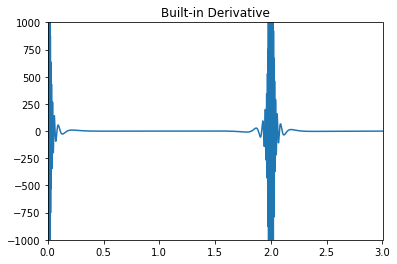

In [15]:
#built-in function
t = np.linspace(0, 3, int(3/h))
f = F(t)
d = np.diff(f)/np.diff(t)
plt.plot(t[0:(len(t)-1)], d)
plt.axis([0, 3, -1000, 1000])
plt.title('Built-in Derivative')

This function hits problems at x = 0 and x = 2 because the function is discontinuous at those points. This causes the graphs of the derivatives to oscillate betwen very large positive and negative numbers at those points.

b) Integral

In [25]:
#homegrown function
h=0.0001
N=int(2/h)
I1 = myint.trapezoidrule(F, 0+h, 2-h, N) #adding/subtracting h from bounds avoids division by 0 errors
eI1 = myint.trapezoiderr(F, 0+h, 2-h, N)
print("Integral calculated using trapezoid rule =", I1, u'\u00B1', eI1)
I2 = myint.simpsonrule(F, 0+h, 2-h, N)
eI2 = myint.simpsonerr(F, 0+h, 2-h, N)
print("Integral calculated using simpson rule =", I2, u'\u00B1', eI1)

#built-in function
I3 = integrate.quad(F, 0, 2)
print("Integral calculated using built-in function =", I3[0], u'\u00B1', I3[1])

#romberg method
I4 = integrate.romberg(F, 0+h, 2-h, tol=1e-12, rtol=1e-12)
print("Integral calculated using romberg method =", I4, u'\u00B1', 1e-12)

Integral calculated using trapezoid rule = 1.4509586602894329 ± 0.00011940017874249402
Integral calculated using simpson rule = 1.451078060468185 ± 0.00011940017874249402
Integral calculated using built-in function = 1.4516877509810684 ± 0.0027123781525915302
Integral calculated using romberg method = 1.4555383988321238 ± 1e-12


The romberg method does not seem to work very well for this integral because it's larger than the integrals calculated using all the other methods by about 0.004.

3) 
$$\int_{0}^{\pi} sin(x^2) dx$$

In [64]:
F = lambda x: np.sin(x**2)

#homegrown function
h=0.0001
N=int(2/h)
I1 = myint.trapezoidrule(F, 0, np.pi, N)
eI1 = myint.trapezoiderr(F, 0, np.pi, N)
print("Integral calculated using trapezoid rule =", I1, u'\u00B1', eI1)
I2 = myint.simpsonrule(F, 0, np.pi, N)
eI2 = myint.simpsonerr(F, 0, np.pi, N)
print("Integral calculated using simpson rule =", I2, u'\u00B1', eI2)

#built-in function 
I3 = integrate.quad(F, 0, np.pi)
print("Integral calculated using built-in function =", I3[0], u'\u00B1', I3[1])

#romberg method
I4 = integrate.romberg(F, 0, np.pi, tol=1e-12, rtol=1e-12)
print("Integral calculated using romberg method =", I4, u'\u00B1', 1e-12)

Integral calculated using trapezoid rule = 0.7726517010280206 ± 1.1662046180601257e-08
Integral calculated using simpson rule = 0.7726517126900752 ± 3.7007434154171886e-16
Integral calculated using built-in function = 0.7726517126900656 ± 1.6493474541321405e-12
Integral calculated using romberg method = 0.7726517126900659 ± 1e-12


$$\int_{0}^{\pi} sin^2(x^2) dx$$

In [65]:
F = lambda x: (np.sin(x**2))**2

#homegrown function
h=0.0001
N=int(2/h)
I1 = myint.trapezoidrule(F, 0, np.pi, N)
eI1 = myint.trapezoiderr(F, 0, np.pi, N)
print("Integral calculated using trapezoid rule =", I1, u'\u00B1', eI1)
I2 = myint.simpsonrule(F, 0, np.pi, N)
eI2 = myint.simpsonerr(F, 0, np.pi, N)
print("Integral calculated using simpson rule =", I2, u'\u00B1', eI2)

#built-in function 
I3 = integrate.quad(F, 0, np.pi)
print("Integral calculated using built-in function =", I3[0], u'\u00B1', I3[1])

#romberg method
I4 = integrate.romberg(F, 0, np.pi, tol=1e-12, rtol=1e-12) 
print("Integral calculated using romberg method =", I4, u'\u00B1', 1e-12)

Integral calculated using trapezoid rule = 1.3190165862383891 ± 1.0036388979154745e-08
Integral calculated using simpson rule = 1.319016576202 ± 2.457293627837013e-15
Integral calculated using built-in function = 1.3190165762020016 ± 7.765149513283174e-12
Integral calculated using romberg method = 1.3190165762020014 ± 1e-12


$$\int_{1}^{e^{\pi/2}} cos(ln(x)) dx$$

In [60]:
F = lambda x: np.cos(np.log(x))

#homegrown function
h=0.0001
N=int(2/h)
I1 = myint.trapezoidrule(F, 1, np.exp(np.pi/2), N)
eI1 = myint.trapezoiderr(F, 1, np.exp(np.pi/2), N)
print("Integral calculated using trapezoid rule =", I1, u'\u00B1', eI1)
I2 = myint.simpsonrule(F, 1, np.exp(np.pi/2), N)
eI2 = myint.simpsonerr(F, 1, np.exp(np.pi/2), N)
print("Integral calculated using simpson rule =", I2, u'\u00B1', eI2)

#built-in function 
I3 = integrate.quad(F, 1, np.exp(np.pi/2))
print("Integral calculated using built-in function =", I3[0], u'\u00B1', I3[1])

#romberg method
I4 = integrate.romberg(F, 1, np.exp(np.pi/2), tol=1e-12, rtol=1e-12)
print("Integral calculated using romberg method =", I4, u'\u00B1', 1e-12)

Integral calculated using trapezoid rule = 1.90523868985385 ± 6.28824622002829e-10
Integral calculated using simpson rule = 1.905238690482685 ± 6.661338147750939e-16
Integral calculated using built-in function = 1.9052386904826757 ± 6.62599489398951e-11
Integral calculated using romberg method = 1.9052386904826761 ± 1e-12


$$\int_{1}^{2\pi} \frac{sin(x)}{ln(x)} dx$$

In [62]:
F = lambda x: np.sin(x)/np.log(x)

#homegrown function
h=0.0001
N=int(2/h)
I1 = myint.trapezoidrule(F, 1, 2*np.pi, N)
eI1 = myint.trapezoiderr(F, 1, 2*np.pi, N)
print("Integral calculated using trapezoid rule =", I1, u'\u00B1', eI1)
I2 = myint.simpsonrule(F, 1, 2*np.pi, N)
eI2 = myint.simpsonerr(F, 1, 2*np.pi, N)
print("Integral calculated using simpson rule =", I2, u'\u00B1', eI2)

#built-in function 
I3 = integrate.quad(F, 1, 2*np.pi)
print("Integral calculated using built-in function =", I3[0], u'\u00B1', I3[1])

#romberg method
I4 = integrate.romberg(F, 1, 2*np.pi, tol=1e-12, rtol=1e-12)
print("Integral calculated using romberg method =", I4, u'\u00B1', 1e-12)

Integral calculated using trapezoid rule = inf ± nan
Integral calculated using simpson rule = inf ± nan
Integral calculated using built-in function = inf ± inf
Integral calculated using romberg method = nan ± 1e-12


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  """Entry point for launching an IPython kernel.
/Users/meganhott/Documents/GitHub/MHott/Problem7/myint.py:23: RuntimeWarning: invalid value encountered in double_scalars
  err2 = (I2-I1)/3
/Users/meganhott/Documents/GitHub/MHott/Problem7/myint.py:39: RuntimeWarning: invalid value encountered in double_scalars
  err2 = (I2-I1)/15
/anaconda3/lib/python3.7/site-packages/scipy/integrate/quadrature.py:619: RuntimeWarning: invalid value encountered in double_scalars
  return (tmp * c - b)/(tmp - 1.0)


The integral of this function cannot be calculated because it is divergent at x = 1. This means that as the step size is decreased when calculating the integral, the result does not approach a number. If the integral is evaluated using the romberg method, the error does not decrease as the step size is decreased, so the function gets stuck in an infinite loop.